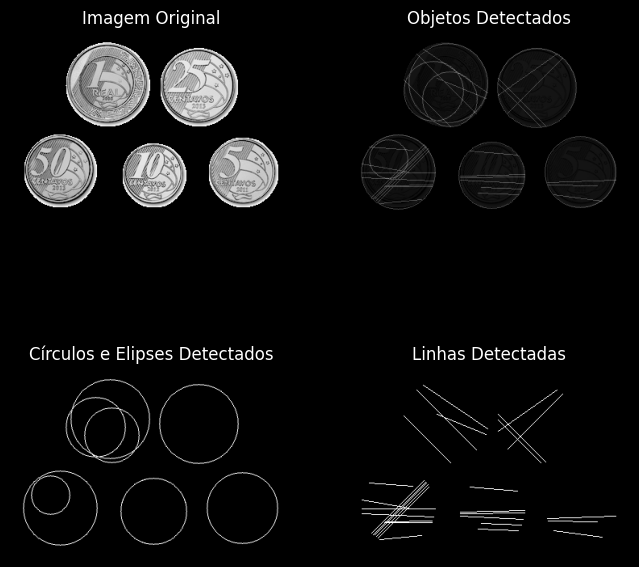

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar imagem
img = cv2.imread('moedas.png', cv2.IMREAD_GRAYSCALE)

# Aplicar suavização Gaussiana para reduzir ruído
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Detectar bordas usando o operador de Canny
edges = cv2.Canny(img_blur, 50, 150, apertureSize=3)

# Detectar círculos usando a transformada de Hough para círculos
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=20, maxRadius=50)

# Desenhar círculos detectados em uma imagem separada
circles_img = np.zeros_like(img)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(circles_img, (x, y), r, (255, 255, 255), 1)

# Detectar elipses usando a transformada de Hough para elipses
ellipses = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=20, maxRadius=50)

# Desenhar elipses detectadas em uma imagem separada
ellipses_img = np.zeros_like(img)
if ellipses is not None:
    ellipses = np.round(ellipses[0, :]).astype("int")
    for (x, y, a) in ellipses:
        cv2.ellipse(ellipses_img, (x, y), (a, a), 0, 0, 360, (255, 255, 255), 1)

# Detectar linhas usando a transformada de Hough para linhas
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=75, minLineLength=50, maxLineGap=10)

# Desenhar linhas detectadas em uma imagem separada
lines_img = np.zeros_like(img)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_img, (x1, y1), (x2, y2), (255, 255, 255), 1)

# Combine as imagens com os objetos detectados com a imagem original
geo = cv2.addWeighted(img, 0.25, circles_img, 0.25, 0)
geo = cv2.addWeighted(geo, 0.5, ellipses_img, 0.25, 0)
geo = cv2.addWeighted(geo, 0.75, lines_img, 0.25, 0)

sphere = cv2.addWeighted(ellipses_img, 0.5, circles_img, 0.5, 0)

# Plotar as imagens
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis(False)
axs[0, 1].imshow(cv2.cvtColor(geo, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Objetos Detectados')
axs[0, 1].axis(False)
axs[1, 0].imshow(sphere, cmap='gray')
axs[1, 0].set_title('Círculos e Elipses Detectados')
axs[1, 0].axis(False)
axs[1, 1].imshow(lines_img, cmap='gray')
axs[1, 1].set_title('Linhas Detectadas')
axs[1, 1].axis(False)
plt.show()

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circle_and_ellipses(path, minDist, param1, param2, minRadius, maxRadius):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    edges = cv2.Canny(img_blur, 50, 150, apertureSize=3)

    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    circles_img = np.zeros_like(img)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(circles_img, (x, y), r, (255, 255, 255), 2)

    ellipses = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    ellipses_img = np.zeros_like(img)
    if ellipses is not None:
        ellipses = np.round(ellipses[0, :]).astype("int")
        for (x, y, a) in ellipses:
            cv2.ellipse(ellipses_img, (x, y), (a, a), 0, 0, 360, (255, 255, 255), 2)

    geo = cv2.addWeighted(img, 0.45, circles_img, 0.55, 0)
    geo = cv2.addWeighted(geo, 0.5, ellipses_img, 0.25, 0)
    sphere = cv2.addWeighted(ellipses_img, 0.5, circles_img, 0.5, 0)

    _, axs = plt.subplots(1, 3, figsize=(8, 8))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Imagem Original')
    axs[0].axis(False)
    axs[1].imshow(cv2.cvtColor(geo, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Objetos Detectados')
    axs[1].axis(False)
    axs[2].imshow(sphere, cmap='gray')
    axs[2].set_title('Círculos e Elipses Detectados')
    axs[2].axis(False)
    plt.show()

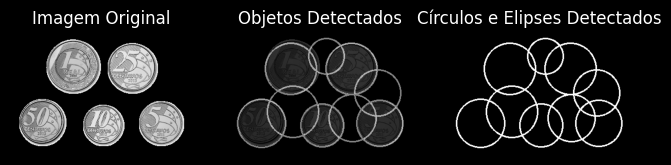

In [45]:
detect_circle_and_ellipses('moedas.png', minDist=50, param1=200, param2=20, minRadius=10, maxRadius=50)

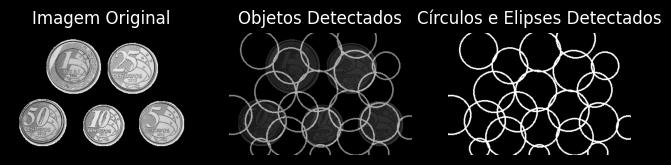

In [46]:
detect_circle_and_ellipses('moedas.png', minDist=50, param1=200, param2=10, minRadius=10, maxRadius=40)

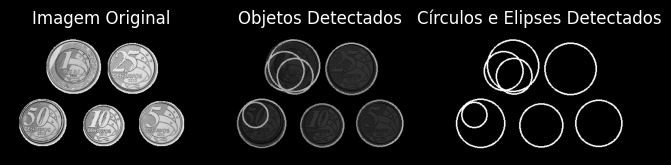

In [47]:
detect_circle_and_ellipses('moedas.png', minDist=20, param1=50, param2=30, minRadius=20, maxRadius=50)

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines(path, threshold):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    edges = cv2.Canny(img_blur, 50, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=threshold, minLineLength=50, maxLineGap=10)
    lines_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lines_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

    geo = cv2.addWeighted(img, 0.55, lines_img, 0.45, 0)

    _, axs = plt.subplots(1, 3, figsize=(8, 8))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Imagem Original')
    axs[0].axis(False)
    axs[1].imshow(cv2.cvtColor(geo, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Objetos Detectados')
    axs[1].axis(False)
    axs[2].imshow(lines_img, cmap='gray')
    axs[2].set_title('Linhas Detectadas')
    axs[2].axis(False)
    plt.show()

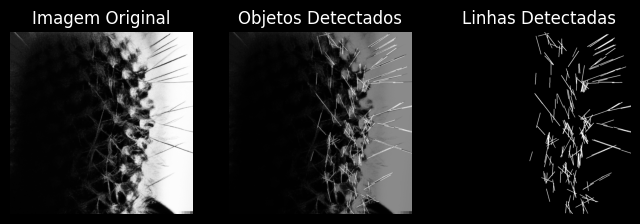

In [38]:
detect_lines('grayscale_2.png', 10)

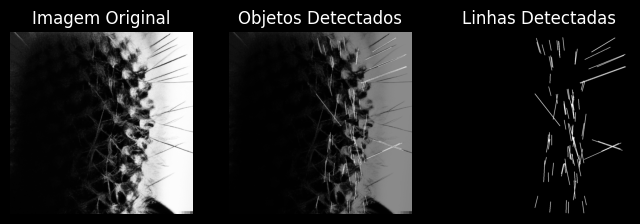

In [39]:
detect_lines('grayscale_2.png', 150)

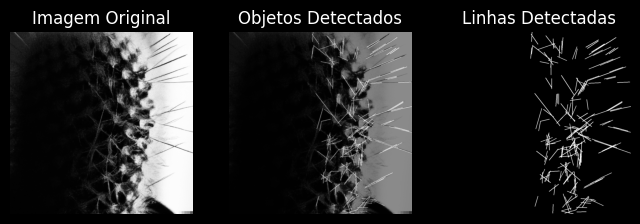

In [41]:
detect_lines('grayscale_2.png', 1)